In [ ]:
# default_exp 
from nbdev.showdoc import *
import numpy as np
import matplotlib.pyplot as plt
import torch
import FRED
from FRED.trainers import *
from FRED.trainers import Trainer
if torch.__version__[:4] == '1.13': # If using pytorch with MPS, use Apple silicon GPU acceleration
    device = torch.device("cuda" if torch.cuda.is_available() else 'mps' if torch.has_mps else "cpu")
else:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)
%load_ext autoreload
%autoreload 2

Using device cuda
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 04c01 Trainer: Flow Neighbor Loss and Diffusion Map Regularization
> A copy of FRED, tailored with particular loss functions

In [14]:
# export
from FRED.embed import ManifoldFlowEmbedder
import datetime
import os
class FlowNeighborDiffMap(Trainer):
    def __init__(self, dataloader, device = device):
        self.vizfiz = [
            save_embedding_visualization,
        ]
        self.loss_weights = {
            "reconstruction": 1,
            "diffusion map regularization": 1,
            "flow neighbor loss": 1e-3,
            "smoothness": 0,
        }
        self.FE = ManifoldFlowEmbedder(
            embedding_dimension=2,
            embedder_shape=[3, 4, 8, 4, 2],
            device=device,
            sigma=0.5,
            flow_strength=0.5,
            smoothness_grid=True,
        )
        self.dataloader = dataloader
        self.title = "Flow Neighbor + Diff Map"
        self.epochs_between_visualization = 10
        self.num_epochs = 1000
        self.timestamp = datetime.datetime.now().isoformat()
        os.mkdir(f"visualizations/{self.timestamp}")
        self.optim = torch.optim.Adam(self.FE.parameters())
        self.scheduler = None
        # for plotting
        self.labels = dataloader.dataset.labels
        self.X = dataloader.dataset.X

# Testing on the Circle

Set sigma =  0.015469238


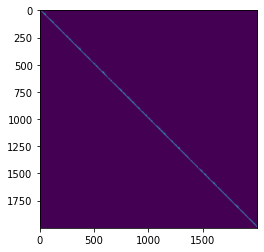

In [10]:
from FRED.datasets import directed_circle
from FRED.data_processing import dataloader_from_ndarray
X, flow, labels = directed_circle(num_nodes=2000)
# build dataset
dataloader = dataloader_from_ndarray(X,flow,labels)

In [15]:
FET = FlowNeighborDiffMap(dataloader)

In [16]:
FET.fit(n_epochs = 1000)

TypeError: fit() got an unexpected keyword argument 'n_epochs'